In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

In [2]:
seed = 7
np.random.seed(seed)

In [46]:
def spirals(points, noise=.5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))


X, y = spirals(625)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(1250, 2)
(1250,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1000, 2)
y_train:	(1000,)
x_test:		(250, 2)
y_test:		(250,)


In [49]:
# Hyperparameters
training_epochs = 500 # Total number of training epochs
learning_rate = 0.003 # The learning rate

In [50]:
# create a model
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8, input_dim=2, activation='relu'))
    model.add(tf.keras.layers.Dense(8,activation='relu'))
    model.add(tf.keras.layers.Dense(8,activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [51]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

In [52]:
prediction_values = model.predict(X_test)
print("Prediction values shape:", prediction_values.shape)

8/8 [==============================] - 0s 637us/step
Prediction values shape: (250, 1)


In [53]:
print(np.mean(results.history["val_accuracy"]))

0.8466879991889


In [54]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0000, accuracy: 100.0000%
Evaluating on testing set...
loss=0.0002, accuracy: 100.0000%


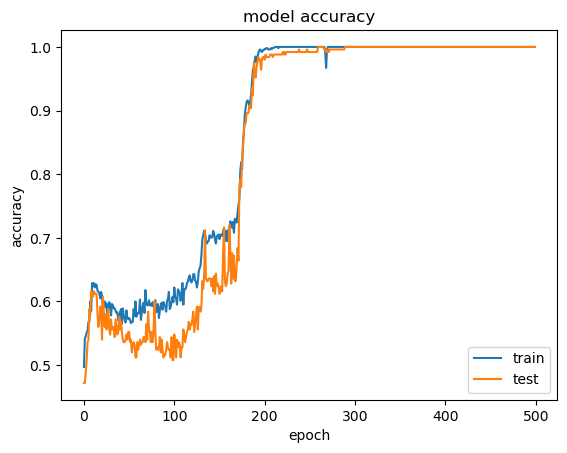

In [55]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

Maximum Loss : 0.7928

Minimum Loss : 0.0000

Loss difference : 0.7928


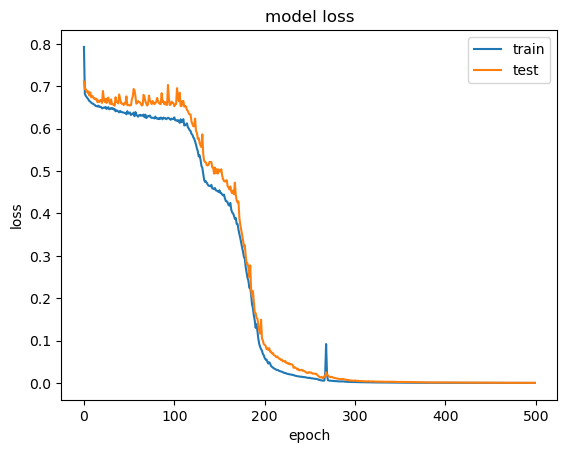

In [56]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))